In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix as sm
import re, os, math, pandas
from PIL import Image

%matplotlib inline

class PCA():
   def __init__(self, X):
      self.n, self.d = X.shape   #X row-wise points
      self.U, self.D = self.solveeigensystem(self.scatter(X))
   def project(self, X, s, m):
      Ureduce = self.U[s:m]     #row-wise eigenvectors
      Z = np.dot(Ureduce, self.center(X).T).T
      return Z
   def denoise(self, X, s, m):
      Ureduce = self.U[s:m]     #row-wise eigenvectors
      Xprime = self.decenter(np.dot(Ureduce.T, self.project(X, s, m).T).T)
      return Xprime
   def center(self, X):
      self.Xbar = (1.0/self.n) * (np.sum(X, axis=0)).T
      return X - self.Xbar
   def decenter(self, X):
      return X + self.Xbar
   def scatter(self, X):
      Xcentered = self.center(X)
      S = np.dot(Xcentered.T, Xcentered)
      return S
   def solveeigensystem(self, X):
      D, U = np.linalg.eigh(X)
      U = U.T[::-1]              #eigen vectors are row-wise now
      D = D[::-1] / (self.n - 1)
      return U, D


2.1 PCA: 2-dimensional Toy Data (2 points)
(a) Load the dataset pca-data-2d.dat and make a scatter plot of the centered data.


In [2]:
data = np.loadtxt("pca-data-2d.dat")
pca = PCA(data)
centered = pca.center(data)

(b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
same data points in the coordinate system spanned by the 2 PCs.


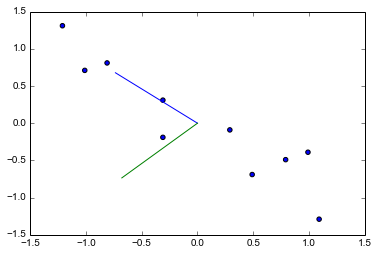

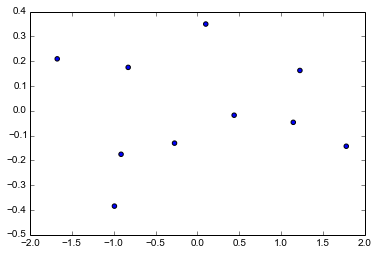

In [3]:
plt.plot([0, pca.U[0,0]],[0, pca.U[0,1]])
plt.plot([0, pca.U[1,0]],[0, pca.U[1,1]])
plt.scatter(centered.T[0], centered.T[1])
plt.show()

projected = pca.project(data,0, 2).T
plt.scatter(projected[0], projected[1])
plt.show()


(c) PCA can be used to compress data e.g. using only information contained in the first j out of N PCs. Plot the reconstruction of the data in the original coordinate system when using (i) only the first or (ii) only the second PC for reconstruction.

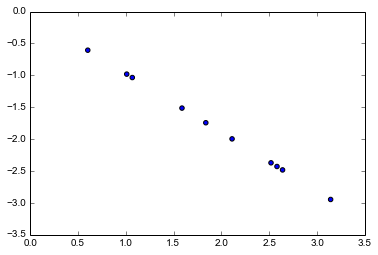

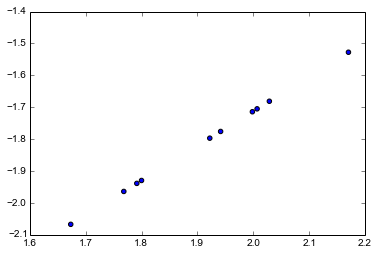

In [4]:
denoiseddata = pca.denoise(data,0,1).T
plt.scatter(denoiseddata[0], denoiseddata[1])
plt.show()

denoiseddata2 = pca.denoise(data,1,2).T
plt.scatter(denoiseddata2[0], denoiseddata2[1])
plt.show()

2.2 PCA: 3-dimensional Toy Data (2 points)
(a) Load the dataset pca-data-3d.txt, center it, and show the scatter plot matrix.


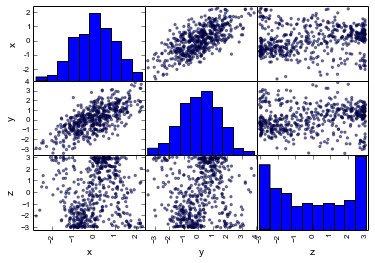

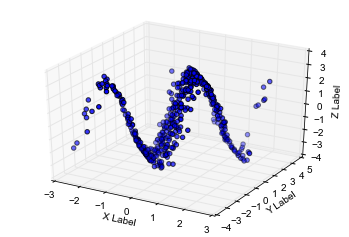

In [5]:
data = np.loadtxt("pca-data-3d.txt",skiprows=1, delimiter=',' )
pca = PCA(data)
#scattereddata = pca.scatter(data).T
dataframe = pandas.DataFrame(data, columns=['x', 'y', 'z'])
sm(dataframe)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.T[0], data.T[1], data.T[2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


(b) Determine the PCs and make the analogous scatter plot matrix for the 2d-coordinate systems
spanned by the different pairs of PCs.



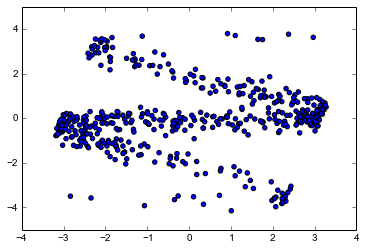

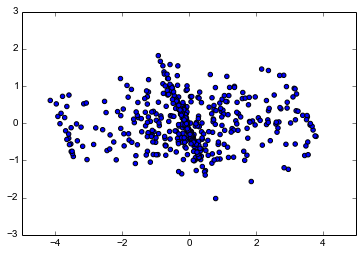

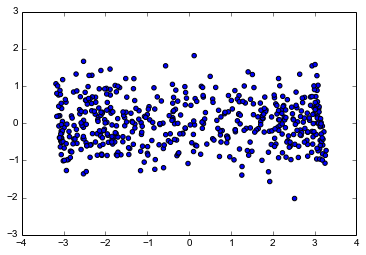

In [6]:
PCs = pca.U

projecteddata01= pca.project(data,0, 2).T
plt.scatter(projecteddata01[0], projecteddata01[1])
plt.show()

projecteddata12 = pca.project(data,1, 3).T
plt.scatter(projecteddata12[0], projecteddata12[1])
plt.show()

Ureduce = pca.U[[0,2]]
projecteddata02 = np.dot(Ureduce, pca.center(data).T)
plt.scatter(projecteddata02[0], projecteddata02[1])
plt.show()



(c) Examine the 3d-reconstruction of the data in the original coordinate systems when using only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful these directions (i.e., the PCs) are.

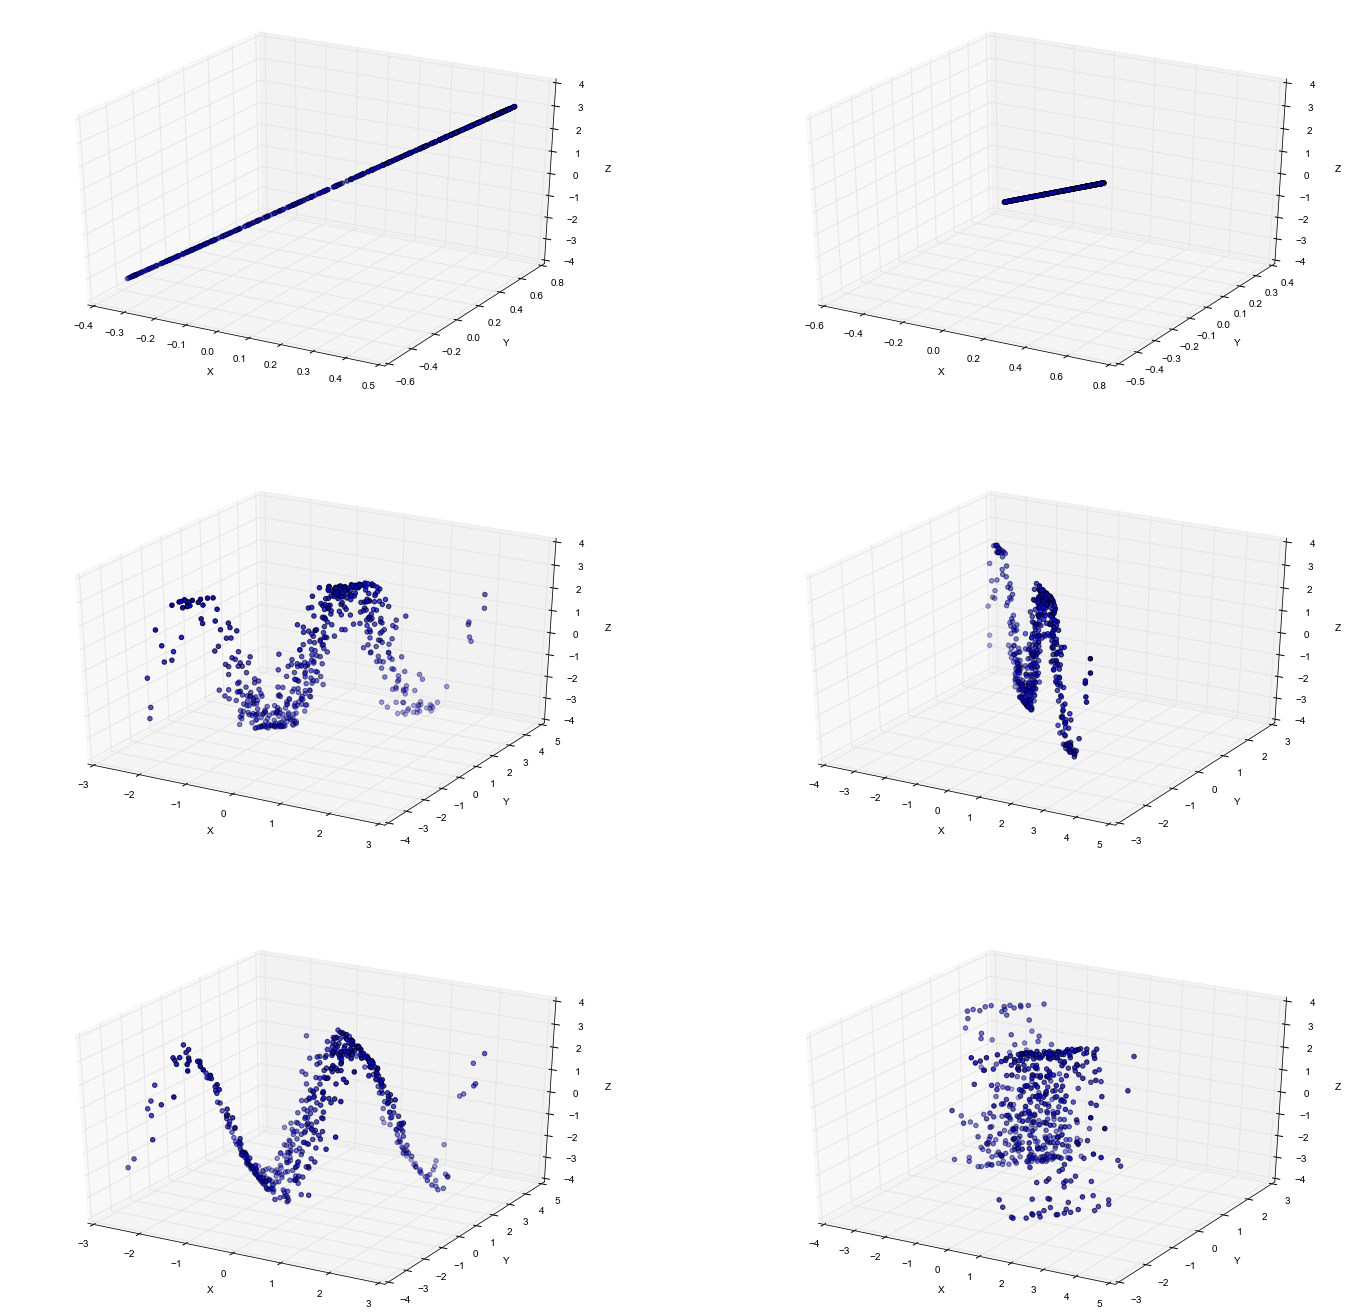

In [7]:
from mpl_toolkits.mplot3d import Axes3D

denoised0 = pca.denoise(data, 0, 1)
denoised1 = pca.denoise(data, 0, 2)
denoised2 = pca.denoise(data, 0, 3)

rotationmatrix = np.array([[0,-1,0],[1,0,0],[0,0,1]])

fig = plt.figure(figsize=(24,48))
ax = fig.add_subplot(621, projection='3d')
ax.scatter(denoised0.T[0], denoised0.T[1], denoised0.T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(622, projection='3d')
ax.scatter(np.dot(denoised0,rotationmatrix).T[0], np.dot(denoised0,rotationmatrix).T[1], np.dot(denoised0,rotationmatrix).T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(623, projection='3d')
ax.scatter(denoised1.T[0], denoised1.T[1], denoised1.T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(624, projection='3d')
ax.scatter(np.dot(denoised1,rotationmatrix).T[0], np.dot(denoised1,rotationmatrix).T[1], np.dot(denoised1,rotationmatrix).T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(625, projection='3d')
ax.scatter(denoised2.T[0], denoised2.T[1], denoised2.T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(626, projection='3d')
ax.scatter(np.dot(denoised2,rotationmatrix).T[0], np.dot(denoised2,rotationmatrix).T[1], np.dot(denoised2,rotationmatrix).T[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()


2.3 Projections of a dynamical system (4 points)
Using the data from the file expDat.txt, we can interpret the data as describing the process of a ”large” system with d=20 dimensions at each timepoint (cf. Exercise Sheet 1).
(a) Find the 20 Principal Components (PCs) of this dataset


In [8]:
data = np.loadtxt("expDat.txt", skiprows=1, delimiter=',', usecols=range(1,21) )
pca = PCA(data)
PCs = pca.U[0:20]


(b) Plot the temporal evolution of the system projected onto the first two PCs by making (i) a scatter plot of the 100 datapoints in the 2d-coordinate system spanned by the first two PCs and (ii) a line plot of the 100 data point projections onto the first PC and onto the second PC (i.e., the plot with x-axis showing the time index should contain two lines ). Use color to indicate the time index in the scatter plot and use that color code also in the line plots to highlight the (temporal) relationship to the scatter plots.



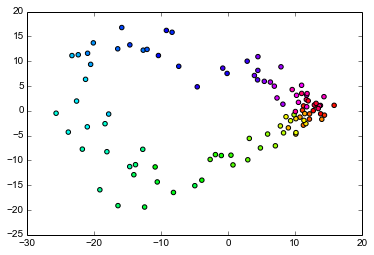

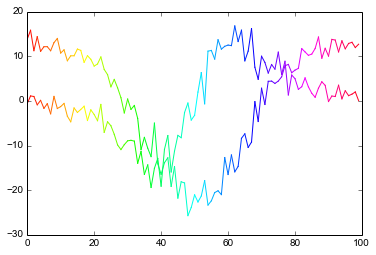

In [9]:
import colorsys
projected = pca.project(data, 0, 2).T
plt.scatter(projected[0], projected[1], c=[colorsys.hsv_to_rgb(i*.01, 1, 1) for i in np.arange(0,99)])
plt.show()

projected1 = pca.project(data, 0, 1)
projected2 = pca.project(data, 1, 2)
for i in np.arange(0,99):
    plt.plot([i, i+1], [projected1[i], projected1[i+1]], color=colorsys.hsv_to_rgb(i*.01, 1, 1))
    plt.plot([i, i+1], [projected2[i], projected2[i+1]], color=colorsys.hsv_to_rgb(i*.01, 1, 1))
plt.show()


(c) Create a new dataset by shuffling the data (i.e. reorder for each of the 20 columns the 100 data point components in a different random sequence).



In [10]:
dat_exp = pandas.DataFrame(data)
dat_exp_shuff = dat_exp.copy()
dat_exp_shuff = dat_exp_shuff.reindex(np.random.permutation(dat_exp_shuff.index))

(d) Plot the covariance matrices and scree plots for both the original and the scrambled data and interpret your results.



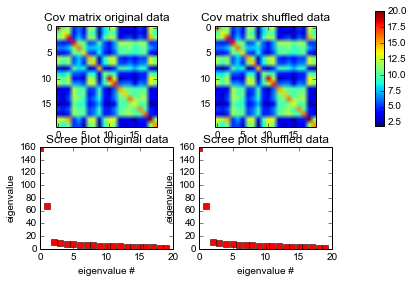

In [11]:
# 3 a)

dat_exp = pandas.DataFrame.from_csv('expDat.txt')

# calc PCs
C = np.cov(dat_exp.T)
D,V = np.linalg.eig(C)

# sort eigenvalues and vectors in descending order
idx = (-D).argsort()
D = D[idx]
V = V[:,idx]

# calc covariance matrices of shuffled and original data
C_orig = np.cov(dat_exp.T)
C_shuff = np.cov(dat_exp_shuff.T)

assert(np.allclose(C_orig, C_shuff))

# calculate eigenvalues and -vectors for shuffled data
D_shuff, V_shuff = np.linalg.eig(C_shuff)

# sort eigenvalues
idx = (- D_shuff).argsort()
D_shuff = D_shuff[idx]

# plot covariance matrix/scree plot for original and shuffled data
fig = plt.figure()

ax = fig.add_subplot(2,2,1)
ax.imshow(C_orig)
ax.set_title('Cov matrix original data')

ax = fig.add_subplot(2,2,2)
im = ax.imshow(C_shuff)
ax.set_title('Cov matrix shuffled data')

ax = fig.add_subplot(2,2,3)
ax.plot(np.arange(len(D)), D, 'rs')
ax.set_title('Scree plot original data')
ax.set_xlabel('eigenvalue #')
ax.set_ylabel('eigenvalue')

ax = fig.add_subplot(2,2,4)
ax.plot(np.arange(len(D_shuff)), D_shuff, 'rs')
ax.set_title('Scree plot shuffled data')
ax.set_xlabel('eigenvalue #')
ax.set_ylabel('eigenvalue')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.55, 0.02, 0.4])
fig.colorbar(im, cax=cbar_ax)

plt.show()

(e) What would be the result if shuffling the data points in the same sequence for all columns (that is randomizing the row order)? (To answer this question no programming is required.)

Randomizing the row order leads to the same structure for the first graph of (a) but with random colors.  If we assume that shuffling changes the color index as well, in the second graph of (a), we will see the same colors but with a random height. But in a more random pattern.  Or yes. 

## 2.4 PCA: Image Data
(2 points)
The file `imgpca.zip` contains different categories of training images. For pictures from
each of the categories nature (prefix `n`) and buildings (prefix `b`) do the following:

(a)  Sample (randomly) a total of at least N=5000 patches (e.g. 500 per image) of 16x16 pixels
from this set of images and assemble them in a big Nx256 matrix.

(b)  Calculate the PCs of these image patches and show the first 24 as 16x16 image patches. Are
there differences between the PCs for buildings vs. nature?

(c)  Answer using a scree plot: how many PCs should you keep for each of the image groups?

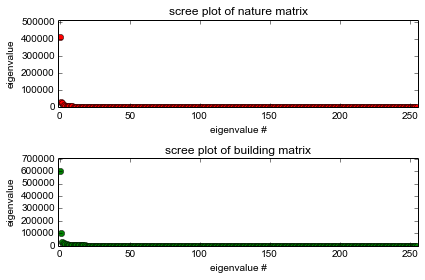

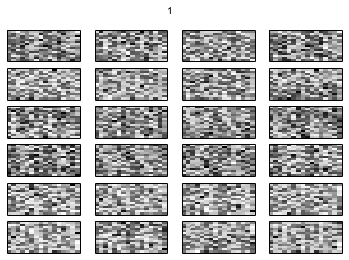

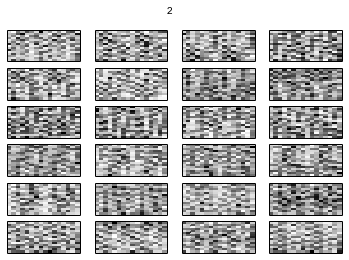

In [13]:
#4. a)
def get_matrix( prefix ) :
    matrix = []
    regex = re.compile("^" + prefix + "([1-9]|10)\.jpg$")
    for _,_,files in os.walk("imgpca") :
        for name in files :
            if regex.match(name) :
                img = Image.open("imgpca/" + name)
                width,height = img.size
                for i in range(500) :
                    x = np.random.randint(0,width-16)
                    y = np.random.randint(0,height-16)
                    matrix.append(list(img.crop((x,y,x+16,y+16)).getdata()))
    return np.array(matrix)


data_nature = get_matrix("n")
data_buildings = get_matrix("b")

# 4.b)

# calculate PCs of both matrices
C_nat = np.cov(data_nature.T)
D_nat, V_nat = np.linalg.eig(C_nat)

C_build = np.cov(data_buildings.T)
D_build, V_build = np.linalg.eig(C_build)

# sort eigenvalues
idx = (-D_build).argsort()
D_build = D_build[idx]
V_build = V_build[:,idx]
idx = (-D_nat).argsort()
D_nat = D_nat[idx]
V_nat = V_nat[:,idx]

# plot sceer plot for eigenvalues of build and nat matrices
f = plt.figure()

ax = f.add_subplot(2,1,1)
ax.plot(np.arange(len(D_nat)), D_nat, 'ro')
ax.set_xlabel('eigenvalue #')
ax.set_ylabel('eigenvalue')
ax.set_title('scree plot of nature matrix')
ax.set_xlim([-1,len(D_nat)])
ax.set_ylim([-1,D_nat[0]+100000])

ax = f.add_subplot(2,1,2)
ax.plot(np.arange(len(D_build)), D_build, 'go')
ax.set_xlabel('eigenvalue #')
ax.set_ylabel('eigenvalue')
ax.set_title('scree plot of building matrix')
ax.set_xlim([-1,len(D_build)])
ax.set_ylim([-1,D_build[0]+100000])

f.tight_layout()

#plt.show()
plt.hold(False)

# reshape eigenvectors
V_nat = V_nat[:,0:24].reshape((24,16,16))
V_build = V_build[:,0:24].reshape((24,16,16))

# show first 24 PCs
fmat = []
for j in range(1,3):
    fig = plt.figure()
    fig.suptitle(j)
    
    for i in range(1, 25):
        ax = fig.add_subplot(6, 4, i);

        if(j==2):
            ax.pcolormesh(V_nat[i-1,:,:], cmap=plt.cm.Greys);
        else:
            ax.pcolormesh(V_build[i-1,:,:],  cmap=plt.cm.Greys)

        ax.invert_yaxis();
        ax.xaxis.tick_top();
        ax.get_yaxis().set_visible(False);
        ax.get_xaxis().set_visible(False);
    fmat.append(fig)
plt.show(fmat)
